In [1]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import pathlib
import hyspec_io, image_render, preprocess
import copy

In [2]:
hyspec_dir = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/2a_Rrs/Sound1')
hyspec_im_path = hyspec_dir / 'Vega_SolaNW_Sound1_Pika_L_16-Crop Wavelengths.bip.hdr'
sgc_refcube_path = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/M_SGC-RefCubes/Sound1/Vega_SolaNW_Sound1_Pika_L_19.bil-SpatialCrop.bip.hdr')

# hyspec_dir = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/2a_Rrs/Coast1')
# hyspec_im_path = hyspec_dir / 'Vega_SolaNW_Coast1_Pika_L_8-Crop Wavelengths.bip.hdr'
# sgc_refcube_path = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/M_SGC-RefCubes/Coast1/Vega_SolaNW_Coast1_Pika_L_27.bil-SpatialCrop.bip.hdr')

# hyspec_dir = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/2a_Rrs/Coast1')
# hyspec_im_path = hyspec_dir / 'Vega_SolaNW_Coast1_Pika_L_22-Crop Wavelengths.bip.hdr'
# sgc_refcube_path = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/M_SGC-RefCubes/Coast1/Vega_SolaNW_Coast1_Pika_L_27.bil-SpatialCrop.bip.hdr')

# hyspec_dir = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/2a_Rrs/Coast2')
# hyspec_im_path = hyspec_dir / 'Vega_SolaNW_Coast2_Pika_L_14-Crop Wavelengths.bip.hdr'
# sgc_refcube_path = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/M_SGC-RefCubes/Coast2/Vega_SolaNW_Coast2_Pika_L_1.bil-SpatialCrop.bip.hdr')

# hyspec_dir = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/2a_Rrs/Coast2')
# hyspec_im_path = hyspec_dir / 'Vega_SolaNW_Coast2_Pika_L_17-Crop Wavelengths.bip.hdr'
# sgc_refcube_path = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/M_SGC-RefCubes/Coast2/Vega_SolaNW_Coast2_Pika_L_1.bil-SpatialCrop.bip.hdr')

sgc_dir = pathlib.Path('/media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/X_TestSGC')

In [3]:
# Read image and reference cube
(hyspec_im,_,rgb_ind,metadata) = hyspec_io.load_envi_image(hyspec_im_path)
(ref_cube,wl,_,_) = hyspec_io.load_envi_image(sgc_refcube_path)

In [4]:
# Create sun clint correction object
sgc = preprocess.HedleySunGlint()

In [5]:
# Fit to reference cube
sgc.fit(np.reshape(ref_cube,(-1,ref_cube.shape[-1])),wl)

In [6]:
# Apply SGC to example image
hyspec_sgc = sgc.remove_glint(hyspec_im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


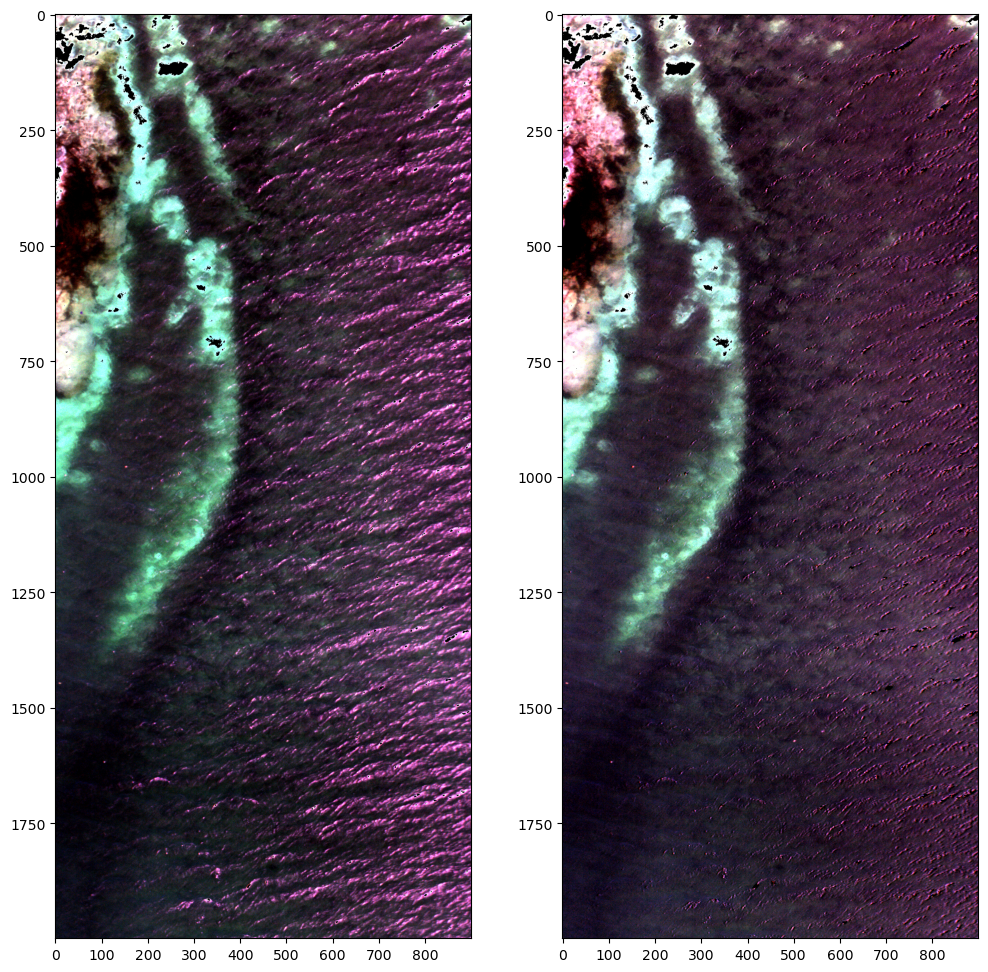

In [7]:
fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(12,12))
ax0.imshow(image_render.percentile_stretch(hyspec_im[:,:,rgb_ind]))  # Warning of data outside range can be ignored
ax1.imshow(image_render.percentile_stretch(hyspec_sgc[:,:,rgb_ind]))  # Warning of data outside range can be ignored
plt.show()

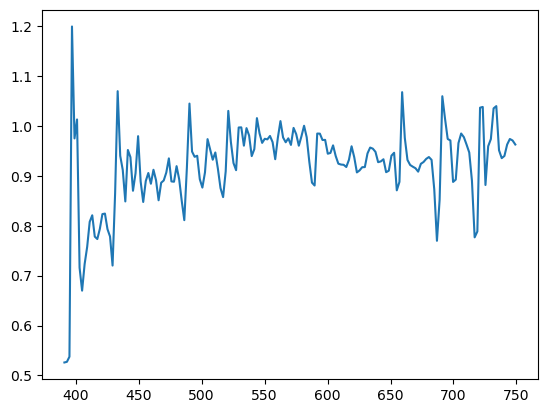

In [8]:
plt.plot(wl[sgc.vis_ind],np.squeeze(sgc.b))

In [9]:
# Update metadata
metadata_mod = copy.copy(metadata)
metadata_mod['wavelength'] = [metadata['wavelength'][ii] for ii in range(len(wl)) if sgc.vis_ind[ii]]

In [10]:
# Create path for output file
output_file = sgc_dir / (str.split(hyspec_im_path.stem,sep='.')[0] + '-SGC.bip.hdr') 
print('Saving sun glint corrected file as ' + str(output_file))

Saving sun glint corrected file as /media/mha114/Massimal/Vega_Sola/Hyperspectral/20220823/Area/X_TestSGC/Vega_SolaNW_Sound1_Pika_L_16-Crop Wavelengths-SGC.bip.hdr


In [11]:
# Save file
hyspec_io.save_envi_image(output_file,hyspec_sgc,metadata_mod)